## Vgridpandas key features

Vgridpandas supports popular geodesic DGGS such as H3, S2, A5, rHEALPix, Open-Eaggr ISEA4T, EASE-DGGS, QTM, and graticule DGGS such as OLC, Geohash, MGRS, GEOREF, Tilecode, Quadkey, Maidenhead, GARS

You can try out vgridpandas by using the cloud-computing platforms below without having to install anything on your computer:


[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgridpandas/blob/main)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgridpandas/HEAD?filepath=docs/notebooks)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgridpandas/blob/main/docs/notebooks/00_intro.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgridpandas/00_intro.ipynb)

Full VgridPandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid in Python or CLI, use [vgrid](https://pypi.org/project/vgrid/) package. Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgridpandas
Uncomment the following line to install [vgridpandas](https://pypi.org/project/vgridpandas/).

In [1]:
# %pip install vgridpandas

### Latlong to DGGS

In [2]:
import pandas as pd
from vgridpandas import h3pandas
df = pd.DataFrame({'lat': [14.6657293, -187.5088058], 'lon': [14, 15]})
resolution = 0
df = df.h3.latlon2h3(resolution)
df.head()

,lat,lon,h3_res
h3,,,
8059fffffffffff,14.665729,14,0
8071fffffffffff,-187.508806,15,0


### DGGS to geo boundary

In [3]:
df = df.h3.h32geo()
df

,lat,lon,h3_res,geometry
h3,,,,
8059fffffffffff,14.665729,14,0,"POLYGON ((-2.48387 22.19754, -4.014 11.5453, 3..."
8071fffffffffff,-187.508806,15,0,"POLYGON ((-175.45827 15.28573, -180.78284 5.88..."


### (Multi)Linestring/ (Multi)Polygon to DGGS

<Axes: >

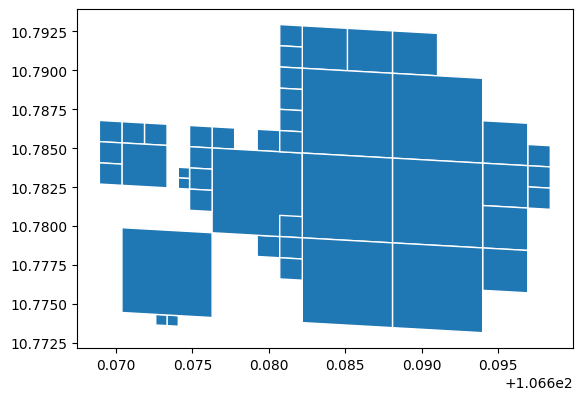

In [4]:
from shapely.geometry import box
from vgridpandas import s2pandas
import geopandas as gpd

gdf = gpd.read_file('https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/polygon.geojson')
resolution = 17
gdf_polyfill = gdf.s2.polyfill(resolution, compact = True, predicate = "intersects", explode = False)
gdf_polyfill = gdf_polyfill.s2.s22geo(s2_column = "s2")
gdf_polyfill.plot(edgecolor = "white")

### DGGS point binning

<Axes: >

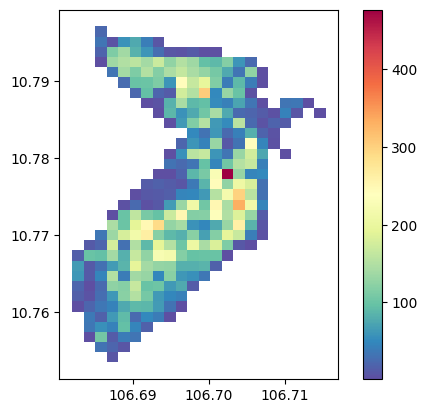

In [5]:
import pandas as pd
from vgridpandas import rhealpixpandas
resolution = 10
df = pd.read_csv("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/csv/dist1_pois.csv")
# df = gpd.read_file("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/dist1_pois.geojson")
stats = "count"
df_bin = df.rhealpix.rhealpixbin(resolution=resolution, stats = stats, 
                                #  numeric_column="confidence",
                                # category_column="category",
                                return_geometry=True)
df_bin.plot(
    column=stats,        # numeric column to base the colors on
    cmap='Spectral_r',        # color scheme (matplotlib colormap)
    legend=True,  
    linewidth=0.2          # boundary width (optional)
)
